In [45]:
import json
import os 
from path import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf



In [13]:
j = Path(r'C:\Users\Bugra\Documents\GitHub\CNN_planes\data\Planes\planesnet\planesnet\planesnet')
planes_path = j

In [18]:
planes = []

all_planes = os.listdir(planes_path)
    # Add them to the list
for ac in all_planes:
    planes.append((ac[0],str(planes_path)+"/"+str(ac)))

# Build a dataframe        
planes = pd.DataFrame(data=planes, columns=['label','image_path'], index=None)
planes.sample(5)

,label,image_path
6737,0,C:\Users\Bugra\Documents\GitHub\CNN_planes\dat...
12155,0,C:\Users\Bugra\Documents\GitHub\CNN_planes\dat...
17701,0,C:\Users\Bugra\Documents\GitHub\CNN_planes\dat...
23993,0,C:\Users\Bugra\Documents\GitHub\CNN_planes\dat...
5190,0,C:\Users\Bugra\Documents\GitHub\CNN_planes\dat...


Total Nmber of planes imgs in dataset :  32000


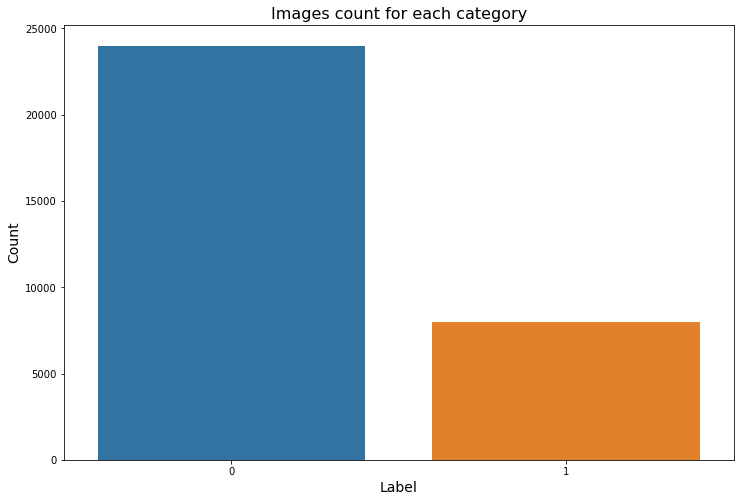

In [31]:
print("Total Nmber of planes imgs in dataset : ", len(planes))
ac_count = planes['label'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=ac_count.index, y=ac_count.values)
plt.title("Images count for each category", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

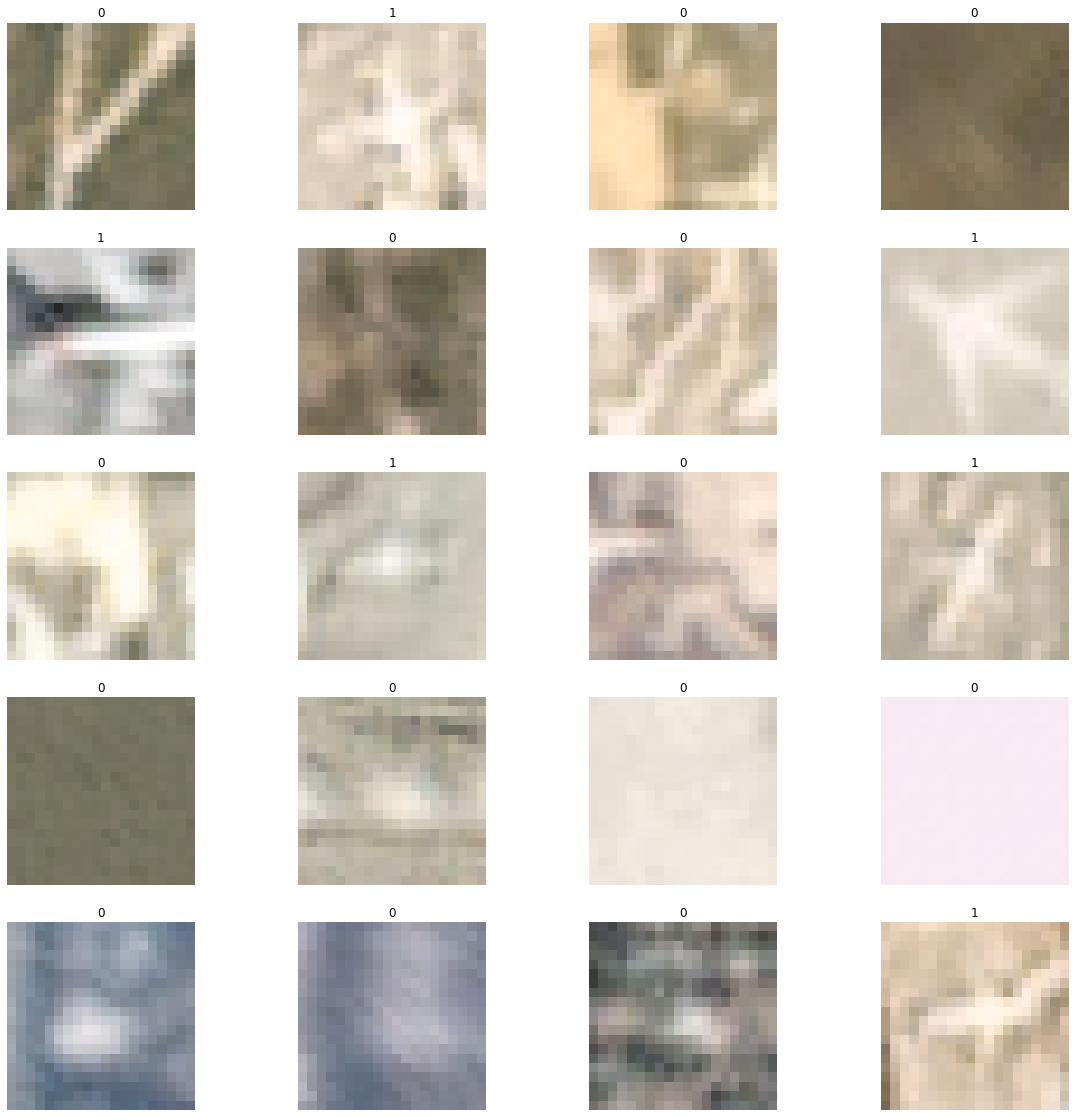

In [37]:
random_samples = []

for item in planes.sample(20).iterrows():
    random_samples.append((item[1].label, item[1].image_path))

f, ax = plt.subplots(5,4, figsize=(20,20))
for i,sample in enumerate(random_samples):
    ax[i//4, i%4].imshow(plt.imread(random_samples[i][1]))
    ax[i//4, i%4].set_title(random_samples[i][0])
    ax[i//4, i%4].axis('off')
plt.show() 

In [33]:
f = open(r'C:\Users\Bugra\Documents\GitHub\CNN_planes\data\Planes\planesnet\planesnet.json')
planesnet = json.load(f)
f.close()

In [47]:
X = np.array(planesnet["data"]) / 255.
X = X.reshape([-1,3,20,20]).transpose([0,2,3,1])
Y = np.array(planesnet['labels'])
Y = tf.keras.utils.to_categorical(Y, 2)

Let`s make sure data is scale by looking min and max value.

In [56]:
print(np.min(X[0]),np.max(X[0]))


0.38823529411764707 1.0


In [60]:
from sklearn.model_selection import train_test_split

In [62]:
x_train , x_test, y_train,y_test = train_test_split(X,Y,test_size=.25,random_state=42,shuffle=True)

In [66]:
print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

Training data shape :  (24000, 20, 20, 3) (24000, 2)
Testing data shape :  (8000, 20, 20, 3) (8000, 2)


In [84]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU ,ReLU
from keras import backend as K


In [85]:
bathc_size = 64
epochs = 20
K.set_image_data_format('channels_last')

In [91]:
model = Sequential()#Create our Model
#First Layer
model.add(Conv2D(16,(3,3),input_shape=(20,20,3),padding='same')) #first layer of our network
model.add(LeakyReLU(alpha=.1)) # for Non-lineraity 
model.add(MaxPooling2D(pool_size=(3,3),padding='same'))
model.add(Dropout(.30))

#Second Layer

model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(alpha=.1))
model.add(MaxPooling2D(pool_size=(3,3),padding='same'))
model.add(Dropout(.30))


#Third layer
model.add(Conv2D(64,(3,3),padding='same'))
model.add(LeakyReLU(alpha=.1))
model.add(MaxPooling2D(pool_size=(3,3),padding='same'))
model.add(Dropout(.30))


model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=.1))
model.add(Dropout(.25))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
plane_fit = model.fit(x_train,y_train,batch_size=bathc_size,epochs=epochs,validation_data=(x_test,y_test))



Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5219 - accuracy: 0.7565 - val_loss: 0.3775 - val_accuracy: 0.8429
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3447 - accuracy: 0.8430 - val_loss: 0.2785 - val_accuracy: 0.8755
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2727 - accuracy: 0.8852 - val_loss: 0.2784 - val_accuracy: 0.8788
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2365 - accuracy: 0.9028 - val_loss: 0.1966 - val_accuracy: 0.9233
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2143 - accuracy: 0.9129 - val_loss: 0.2130 - val_accuracy: 0.9084
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1968 - accuracy: 0.9201 - val_loss: 0.1775 - val_accuracy: 0.9284
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1921 - accuracy: 0.9217 - val_loss: 0.2308 - val_accuracy: 0.9010
Epoch 

In [99]:
from keras.callbacks import EarlyStopping
monitor = EarlyStopping(patience= 2)
model.fit(x_train,y_train,batch_size= 64,epochs=100,validation_data=(x_test,y_test),callbacks=[monitor])

Epoch 1/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1221 - accuracy: 0.9546 - val_loss: 0.1259 - val_accuracy: 0.9521
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1252 - accuracy: 0.9528 - val_loss: 0.1060 - val_accuracy: 0.9588
Epoch 3/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1237 - accuracy: 0.9536 - val_loss: 0.1043 - val_accuracy: 0.9611
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1216 - accuracy: 0.9525 - val_loss: 0.1057 - val_accuracy: 0.9606
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1254 - accuracy: 0.9510 - val_loss: 0.0798 - val_accuracy: 0.9710
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1158 - accuracy: 0.9553 - val_loss: 0.0958 - val_accuracy: 0.9655
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.1196 - accuracy: 0.9528 - val_loss: 0.1427 - val_accuracy: 0.9421

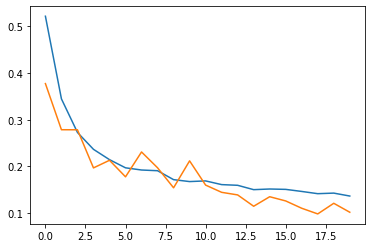

In [100]:
plt.plot(plane_fit.history['loss'])
plt.plot(plane_fit.history['val_loss'])
plt.show()

model.load_weights

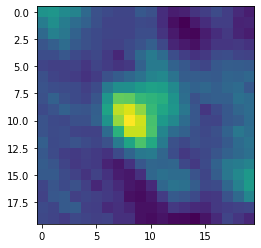

In [107]:
t= x_test[6,:, : ,1]
plt.imshow(t)